In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df=pd.read_csv('FB_Analytics.csv')

In [31]:
df.Captions=df.Captions.astype(str)

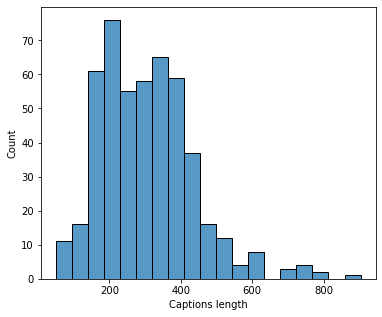

In [9]:
plt.figure(figsize=(6,5))
sns.histplot(data=df['Captions'].str.len())
plt.xlabel('Captions length')
plt.ylabel('Count')

plt.savefig('FBlen24.jpg')

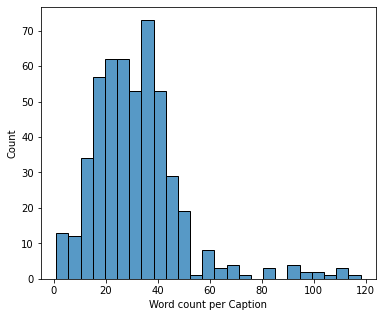

In [15]:
plt.figure(figsize=(6,5))
sns.histplot(data=df['Captions'].apply(lambda x: len(str(x).split())))
plt.xlabel('Word count per Caption')
plt.savefig('FBCommentswords.jpg')

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from collections import defaultdict
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [33]:
corpus=[]
new=df['Captions'].str.split().values.tolist()
corpus=[w for word in new for w in word ]
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [34]:
item=sorted(dic.items(),key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*item)

In [35]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    cv=CountVectorizer(ngram_range=(n,n)).fit(corpus)
    BoW=cv.transform(corpus)
    sum_of_words=BoW.sum(axis=0)
    word_freq=[(word,sum_of_words[0,index]) for word,index in cv.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:10]

In [36]:
!pip install wordcloud

^C


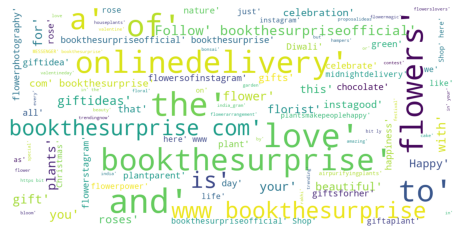

In [38]:
from wordcloud import WordCloud
def WCgenerator(data):
    cloud=WordCloud(background_color='white',stopwords=stop,max_words=100,
            max_font_size=30,
            scale=3,
            random_state=1)

    wc=cloud.generate(str(data))
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(wc)
    plt.savefig('WordCloudFB.jpg')
    
    
WCgenerator(corpus)

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["Captions"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['negative', 'neutral', 'positive'])

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


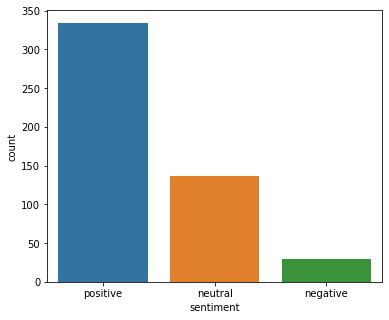

In [40]:
plt.figure(figsize=(6,5))
sns.countplot(df['sentiment'])
plt.savefig('FBsentiment24.jpg')

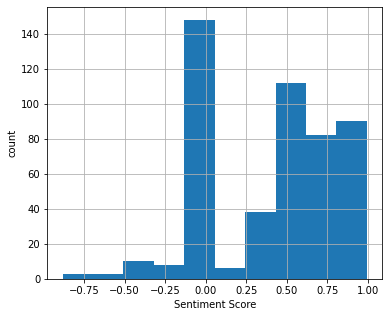

In [41]:
plt.figure(figsize=(6,5))
df.sentiment_score.hist()
plt.xlabel('Sentiment Score')
plt.ylabel('count')
plt.savefig('FBsentimentscore.jpg')

In [42]:
!pip install spacy

In [43]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [44]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

def NER(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['Captions'].apply(lambda x : NER(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

In [45]:
x,y=map(list,zip(*count))

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


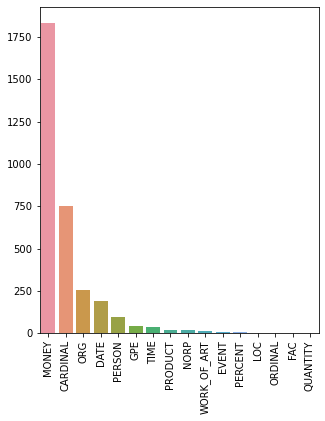

In [46]:
plt.figure(figsize=(5,6))
sns.barplot(x,y)
plt.xticks(rotation=90)
plt.savefig('FBtopic24.jpg')

In [47]:
import nltk
import gensim
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['Captions']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0,
  '0.017*"bookthesurprise" + 0.014*"gift" + 0.009*"love" + 0.009*"giftideas" + 0.009*"Follow" + 0.008*"bookthesurpriseofficial" + 0.008*"onlinedelivery" + 0.007*"www.bookthesurprise.com" + 0.005*"plant" + 0.004*"contest"'),
 (1,
  '0.009*"gift" + 0.007*"love" + 0.006*"bookthesurprise" + 0.005*"flower" + 0.005*"rakhi" + 0.005*"father" + 0.005*"nan" + 0.004*"fathersday" + 0.004*"rakhifestival" + 0.004*"rakhispecial"'),
 (2,
  '0.029*"flower" + 0.016*"plant" + 0.013*"bookthesurprise" + 0.013*"rose" + 0.009*"onlinedelivery" + 0.009*"flowerstagram" + 0.008*"flowersofinstagram" + 0.008*"bookthesurpriseofficial" + 0.008*"Follow" + 0.008*"love"'),
 (3,
  '0.011*"bookthesurprise" + 0.010*"cake" + 0.008*"love" + 0.008*"woman" + 0.007*"She" + 0.006*"dessert" + 0.005*"http" + 0.005*"Valentine" + 0.005*"Love" + 0.005*"gift"')]

In [48]:
!pip install pyldavis

In [49]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\suhai\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.125294 -0.098365       1        1  33.321587
0     -0.055114  0.127441       2        1  31.130042
3      0.114527 -0.069588       3        1  21.239180
1      0.065881  0.040512       4        1  14.309191, topic_info=                         Term        Freq       Total Category  logprob  \
48                     flower  148.000000  148.000000  Default  30.0000   
119                      cake   36.000000   36.000000  Default  29.0000   
261        flowersofinstagram   37.000000   37.000000  Default  28.0000   
223                      rose   67.000000   67.000000  Default  27.0000   
243                      gift   89.000000   89.000000  Default  26.0000   
...                       ...         ...         ...      ...      ...   
5             bookthesurprise   11.144780  166.737244   Topic4  -5.0902   
48                     flower    9.622985  148.865932   Topic4  -5.2370   
1587                  brother    5.739192   15.734876   Topic4  -5.7538   
204   www.bookthesurprise.com    6.388016   61.188624   Topic4  -5.6467   
1070                    india    5.419148   22.190808   Topic4  -5.8112   

      loglift  
48    30.0000  
119   29.0000  
261   28.0000  
223   27.0000  
243   26.0000  
...       ...  
5     -0.7612  
48    -0.7946  
1587   0.9357  
204   -0.3153  
1070   0.5345  

[256 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
1027      2  0.902613                   Amazon
1995      2  0.888810                      And
1538      2  0.932292                   Bonsai
127       1  0.068831          Congratulations
127       2  0.894806          Congratulations
...     ...       ...                      ...
204       1  0.375887  www.bookthesurprise.com
204       2  0.424916  www.bookthesurprise.com
204       3  0.098057  www.bookthesurprise.com
204       4  0.098057  www.bookthesurprise.com
390       3  0.927867                    yummy

[374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

<AxesSubplot:xlabel='comment', ylabel='like'>

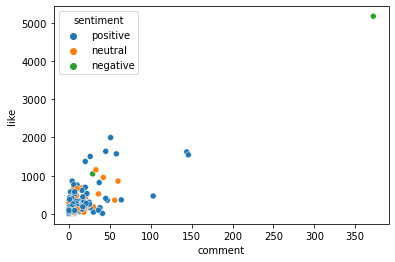

In [70]:
sns.scatterplot(data=df,x='comment',y='like',hue='sentiment')

In [71]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions', 'Captions',
       'sentiment_score', 'sentiment'],
      dtype='object')